In [6]:
!git clone https://github.com/jaspreetxkaur/SCT_DS_Task3.git
%cd SCT_DS_Task3




Cloning into 'SCT_DS_Task3'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 30 (delta 4), reused 14 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 885.54 KiB | 6.06 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/SCT_DS_Task3


In [7]:
!ls -R



.:
data  LICENSE  notebooks  README.md  requirements.txt  scripts	src  tests

./data:
raw

./data/raw:
bank-additional-full.csv   bank-full.csv
bank-additional-names.txt  bank-names.txt

./notebooks:
01_EDA.ipynb  02_modeling.ipynb

./scripts:
run_pipeline.sh

./src:
data_ingest.py	features.py  preprocess.py  utils.py
evaluate.py	__init__.py  train.py

./tests:
test_preprocess.py


In [8]:
import pandas as pd
df = pd.read_csv("data/raw/bank-full.csv", sep=";")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
!git pull origin main


From https://github.com/jaspreetxkaur/SCT_DS_Task3
 * branch            main       -> FETCH_HEAD
Already up to date.


In [10]:
# Dataset info
df.info()

# Summary statistics (numeric only)
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


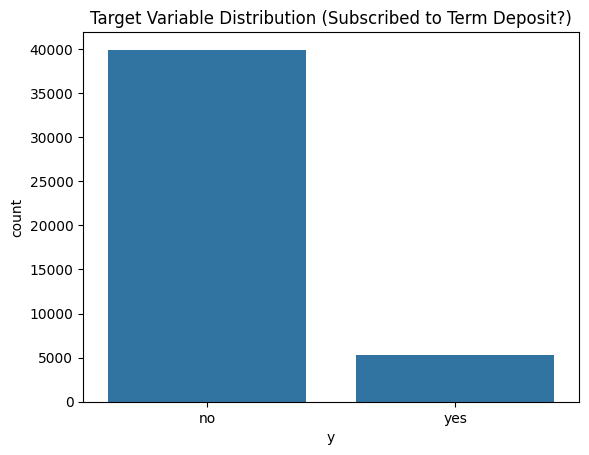

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


In [13]:
sns.countplot(x="y", data=df)
plt.title("Target Variable Distribution (Subscribed to Term Deposit?)")
plt.show()

print(df["y"].value_counts(normalize=True))


In [14]:
# Convert categorical to numeric (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

print("Shape before encoding:", df.shape)
print("Shape after encoding:", df_encoded.shape)


Shape before encoding: (45211, 17)
Shape after encoding: (45211, 43)


In [15]:
X = df_encoded.drop("y_yes", axis=1)  # 'y' converted to 0/1, column will be y_yes
y = df_encoded["y_yes"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (45211, 42)
Target shape: (45211,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)



Train size: (36168, 42)
Test size: (9043, 42)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled train shape:", X_train_scaled.shape)


Scaled train shape: (36168, 42)


In [19]:
from sklearn.linear_model import LogisticRegression

# Train model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [20]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # probability of class "yes"


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.901249585314608
Precision: 0.643979057591623
Recall: 0.3487712665406427
F1 Score: 0.45248313917841815

Confusion Matrix:
 [[7781  204]
 [ 689  369]]

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.95      7985
        True       0.64      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



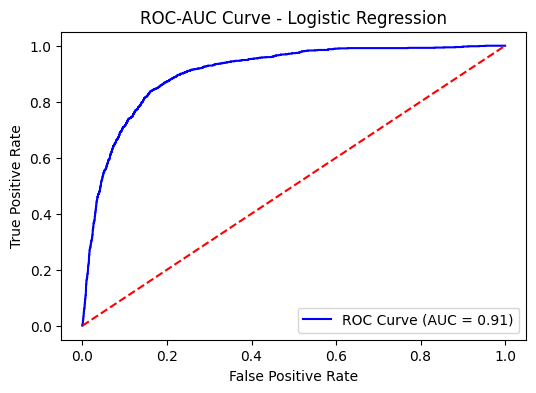

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve - Logistic Regression")
plt.legend()
plt.show()


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


In [24]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

import pandas as pd
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.901250,0.643979,0.348771,0.452483
1,Decision Tree,0.877695,0.478261,0.499055,0.488437
2,Random Forest,0.904456,0.655449,0.386578,0.486326
3,Gradient Boosting,0.904346,0.645991,0.403592,0.496800


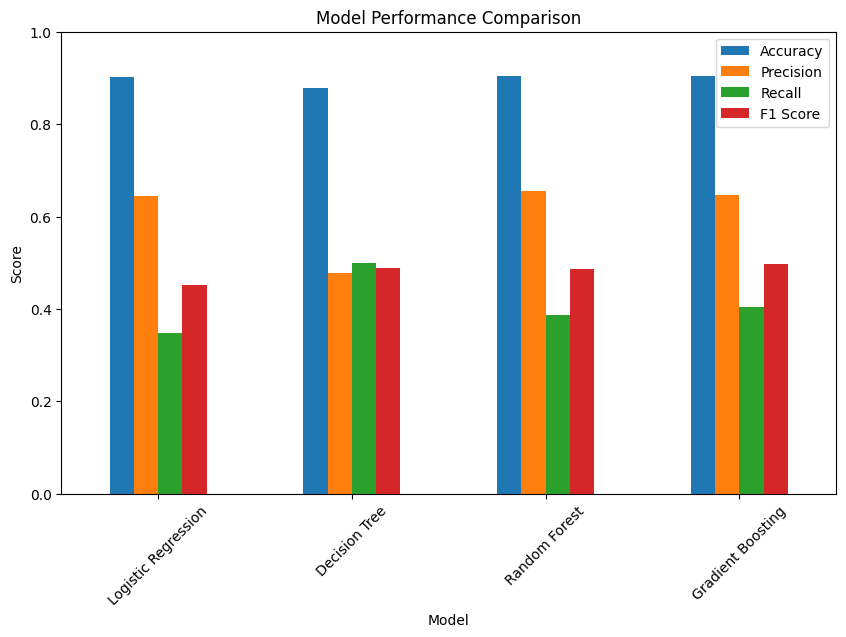

In [25]:
import matplotlib.pyplot as plt

results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind="bar", figsize=(10,6)
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [28]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [ ]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring="f1"
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (CV):", grid_search.best_score_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [ ]:
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
